<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Size_distribution_100Hz_SpectralClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
df = pd.read_csv('/content/drive/MyDrive/CIOP/size distrubution_100Hz.csv',sep=';')
df.dropna(inplace=True)
df.head()



,,Label,Area,Perim.,Major,Minor,Angle,Circ.,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Group,AR2,Equivalent Diameter,Circ sqrt
0,169,210902_#4_100_30_1um_i002.tif:0124-0106,2977.920,438.884,94.390,40.169,85.995,0.194,113.371,102.0,147.0,79.919,53.536,2.350,0.426,0.654,0,0.472220,61.576014,0.440770
1,169,210902_#5_100_20_1um_i005.tif:0539-2012,2682.589,467.197,67.979,50.245,9.165,0.154,109.253,1990.0,535.0,177.397,74.108,1.353,0.739,0.476,0,0.678315,58.442950,0.392990
2,170,210902_#4_100_30_1um_i002.tif:0174-0182,836.771,189.075,45.890,23.216,153.454,0.294,59.168,172.0,169.0,146.976,32.056,1.977,0.506,0.598,0,0.541779,32.640618,0.542343
3,170,210902_#5_100_20_1um_i005.tif:0529-2408,2454.938,399.696,62.957,49.649,61.143,0.193,82.901,2395.0,539.0,51.072,64.960,1.268,0.789,0.596,0,0.783585,55.908176,0.439436
4,171,210902_#4_100_30_1um_i002.tif:0406-0210,1790.443,217.387,65.386,34.865,143.540,0.476,71.934,201.0,396.0,136.397,43.690,1.875,0.533,0.774,0,0.607362,47.745815,0.690004


In [378]:
from sklearn.cluster import SpectralClustering

In [379]:
kmeans = SpectralClustering(n_clusters=2,
                            affinity='nearest_neighbors',
                            assign_labels='kmeans',
                            random_state=466)

In [380]:
df_kcluster = df[['Perim.', 'Equivalent Diameter','Circ sqrt','Solidity', 'AR2' ,'Area']].copy()
df_kcluster

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,438.884,61.576014,0.440770,0.654,0.472220,2977.920
1,467.197,58.442950,0.392990,0.476,0.678315,2682.589
2,189.075,32.640618,0.542343,0.598,0.541779,836.771
3,399.696,55.908176,0.439436,0.596,0.783585,2454.938
4,217.387,47.745815,0.690004,0.774,0.607362,1790.443
...,...,...,...,...,...,...
1151,146.994,45.562953,0.973783,0.993,0.752593,1630.473
1152,110.191,33.470092,0.954247,0.979,0.724957,879.840
1153,106.159,32.034981,0.948020,0.946,0.675723,806.007
1154,102.828,31.292764,0.956054,0.984,0.638892,769.091


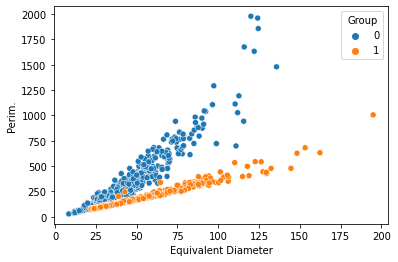

In [381]:
sns.scatterplot(data=df, y='Perim.',x='Equivalent Diameter', hue='Group')

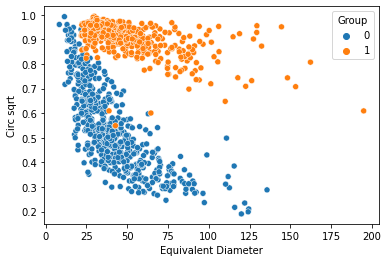

In [382]:
sns.scatterplot(data=df, y='Circ sqrt',x='Equivalent Diameter',hue='Group')

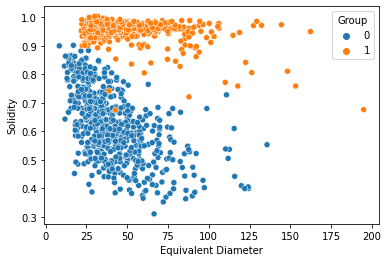

In [383]:
sns.scatterplot(data=df, y='Solidity',x='Equivalent Diameter',hue='Group')

In [384]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_kcluster)
df_kcluster_scaled = scaler.transform(df_kcluster)

In [385]:
df_kcluster_scaled = pd.DataFrame(df_kcluster_scaled, columns = df_kcluster.columns)
df_kcluster_scaled.head(2)

,Perim.,Equivalent Diameter,Circ sqrt,Solidity,AR2,Area
0,0.210848,0.285075,0.311416,0.495677,0.376402,0.098100
1,0.225358,0.268280,0.251960,0.239193,0.661452,0.088187


In [386]:
kmeans.fit(df_kcluster_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=2, random_state=466)

In [387]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [388]:
#sns.scatterplot(data=df_kcluster, y='Perim.',x='Equivalent Diameter', hue=kmeans.labels_)

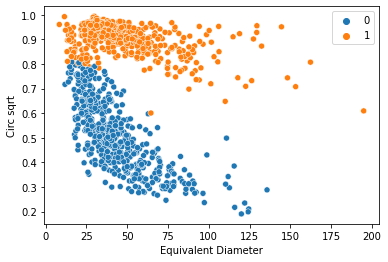

In [389]:
sns.scatterplot(data=df_kcluster, y='Circ sqrt',x='Equivalent Diameter', hue=kmeans.labels_)

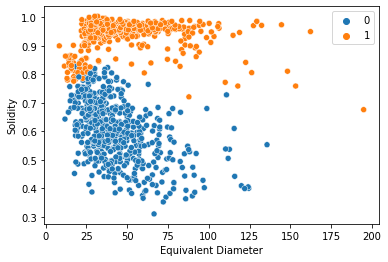

In [390]:
sns.scatterplot(data=df_kcluster, y='Solidity',x='Equivalent Diameter', hue=kmeans.labels_)

In [392]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(df['Group'],kmeans.labels_))
print(accuracy_score(df['Group'],kmeans.labels_))

[[534  47]
 [  2 561]]
0.9571678321678322
